# **Détection de visages à partir d'une image ou d'une vidéo (stream)**
---
---
La détection des visages consiste à identifier le visage d'une personne dans une image ou une vidéo. Ainsi, il faudra analyser le contenu visuel afin de déterminer si les caractéristiques d'un visage d'une personne sont présents ou pas.

Les visages humains sont très variés (personnes d'origines, de sexes et de cultures différents). Les apporoches ML supervisées de détection des visages doivent être entraînés sur de larges quantités de données d'entrée pour pouvoir se généraliser sur de nouvelles données.

D'autre part, les approches proposées doivent être robustes aux différents types d'éclairage, aux transformations géométriques, etc.  Par conséquent, on augmente souvent les datasets d'apprentissage par des données vérifiant ces hypothèses.

Dans le cadre de TP, nous allons utiliser une implémentation OpenCV de la méthode de cascade de Haar qui est un modèle supervisé pré-entrainé.

**Méthode de casacde de Haar**

---



Cette méthode a été intrduite par Paul Viola et M.ichael Jones en 2001, [www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf](www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf) [1].
L'idée principale de cette méthode consiste à utiliser une cascade de classificateurs pour détecter les différentes caractéristiques d'une image. Ces classificateurs sont ensuite combinés en un classificateur fort capable de distinguer avec précision les échantillons contenant un visage humain de ceux qui n'en contiennent pas.

Le classificateur Haar Cascade implémenté dans OpenCV est pré-entrainé sur un large ensemble de données de visages humains. Ainsi, il n'est pas nécessaire de le re-entrainer. Il suffit de charger le classificateur à partir de la bibliothèque et de l'utiliser pour détecter les visages sur une image d'entrée.



**Référence**
[1] P. Viola and M. Jones, "Rapid object detection using a boosted cascade of simple features," Proceedings of the 2001 IEEE Computer Society Conference on Computer Vision and Pattern Recognition. CVPR 2001, Kauai, HI, USA, 2001, pp. I-I, doi: 10.1109/CVPR.2001.990517.

## ***Question 1- Lire une image contenant un visage***

## Importer les librairies
OpenCV, Numpy, Matplotlib

In [1]:
import cv2
import numpy
import matplotlib.pyplot as plt


## Charger et afficher l'image
Soit l'image visage.jpg (dans le fichier ci-joint). Lire et afficher cette image. Vérifier les dimensions de l'image

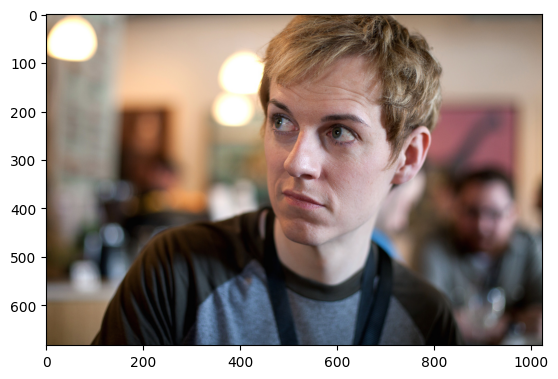

Dimensions de l'image : (683, 1024, 3)


In [2]:
# Charger l'image
image = cv2.imread('visage.jpg')

# Afficher l'image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Vérifier les dimensions de l'image
print('Dimensions de l\'image :', image.shape)

## Convertir l'image en niveaux de gris

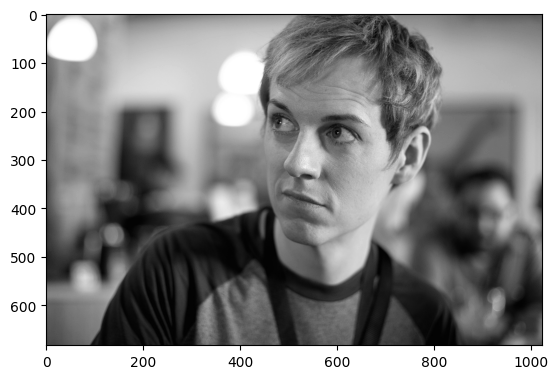

In [3]:
# Charger l'image
image = cv2.imread('visage.jpg')

# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Afficher l'image en niveaux de gris
plt.imshow(gray_image, cmap='gray')
plt.show()


## Instancier et charger le classifieur CascadeClassifier
Pour plus d'informations vous pouvez regarder [OpenCv CascadeClassifier](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html)

In [4]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

## Appliquer le classifieur

In [5]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

## Dessiner une boite englobante

In [6]:
# Détecter les visages
faces = face_classifier.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))

# Pour chaque visage détecté
for (x, y, w, h) in faces:
    # Dessiner un rectangle rouge avec une épaisseur de 2
    image_rectangle = cv2.rectangle(image.copy(), (x, y), (x+w, y+h), (0, 0, 255), 2)

ReConvertir l'image ---> Image couleur et afficher l'image

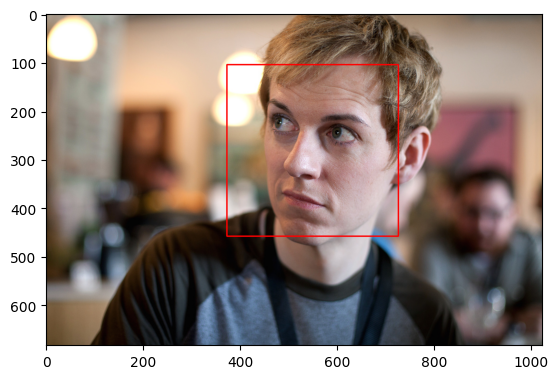

In [7]:
# Afficher l'image
plt.imshow(cv2.cvtColor(image_rectangle, cv2.COLOR_BGR2RGB))
plt.show()

## Lire à partir de la WebCam
Ecrire un programme permettant de détecter directement un visage à partir du flux WebCam et d'encadrer le visage si trouvé.
Vous pouvez utiliser
1.   cv2.VideoCapture(0) : capture de la vidéo / entrée WebCam
2.   Réaliser une boucle : While True : Pour parcourir les frames de la vidéo



In [8]:
#Lire à partir de la WebCam
video_capture = cv2.VideoCapture(0)

In [9]:
# Charger le classificateur en cascade Haar pour les visages
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Capturer le flux vidéo de la webcam
cap = cv2.VideoCapture(0)

while True:
    # Lire une image du flux vidéo
    ret, img = cap.read()

    # Convertir en niveaux de gris
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Détecter les visages
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Dessiner un rectangle autour de chaque visage détecté
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

    # Afficher l'image résultante
    cv2.imshow('img',img)

    # Quitter si 'q' est pressé
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libérer la capture vidéo et fermer toutes les fenêtres
cap.release()
cv2.destroyAllWindows()